# GPU_CUDA_PRICE_Analysis

In [1]:
# Importing data 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
cuda_df = pd.read_csv(r'C:\Users\willh\iCloudDrive\Data Analyst Projects\GPU CUDA\datasets\GeekBench5_CUDA.csv')
gpu_specs = pd.read_csv(r'C:\Users\willh\iCloudDrive\Data Analyst Projects\GPU\datasets\gpu_specs_v6.csv')
gpu_prices = pd.read_csv(r'C:\Users\willh\iCloudDrive\Data Analyst Projects\GPU CUDA\datasets\GPU_Prices.csv')
gpu_specs2 = pd.read_csv(r'C:\Users\willh\iCloudDrive\Data Analyst Projects\GPU CUDA\datasets\gpus_v2.csv')

In [3]:
cuda_df.head()

,Unnamed: 0,manufacturer,Device,Score
0,0,NVIDIA,GeForce RTX 3090 Ti,260346
1,1,NVIDIA,A100 80GB PCIe,259828
2,2,NVIDIA,A100-PCIE-80GB,256292
3,3,NVIDIA,GeForce RTX 3090,238123
4,4,NVIDIA,A100-SXM4-40GB,237220


In [4]:
cuda_df.shape

(401, 4)

In [5]:
gpu_specs.head()

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512


In [6]:
gpu_specs.shape

(2889, 16)

In [7]:
gpu_prices.head()

,Videocard Name,Price (USD)
0,GeForce RTX 3090 Ti,2099.99
1,GeForce RTX 3080 Ti,1199.99
2,GeForce RTX 3090,1749.99
3,Radeon RX 6900 XT,1120.31
4,GeForce RTX 3080,999.00


In [8]:
gpu_prices.shape

(2317, 2)

In [9]:
gpu_specs2.head()


,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP
0,NVIDIA,Desktop,GeForce 8300 GS,2007,80,210,127,512,6.4,14.4,40.0
1,NVIDIA,Desktop,GeForce 8400 GS,2007,80,210,127,512,6.4,28.8,40.0
2,NVIDIA,Desktop,GeForce 8400 GS rev.2,2007,65,210,86,512,6.4,24.4,25.0
3,NVIDIA,Desktop,GeForce 8400 GS rev.3,2010,40,260,57,1024,9.6,19.7,25.0
4,NVIDIA,Desktop,GeForce 8500 GT,2007,80,210,127,1024,12.8,28.8,45.0


In [10]:
gpu_specs2.shape

(498, 11)

### Formatting Columns

#### Formatting cuda_df

In [11]:
# Remove column 'Unnamed: 0' 

cuda_df = cuda_df.drop('Unnamed: 0',axis=1)

print(cuda_df.columns)


Index(['manufacturer', 'Device', 'Score'], dtype='object')


In [12]:
cuda_df = cuda_df.rename(columns = {'Device':'productName','Score':'CUDA Score'})
cuda_df.columns

Index(['manufacturer', 'productName', 'CUDA Score'], dtype='object')

#### Formatting gpu_prices

In [13]:
gpu_prices = gpu_prices.rename(columns = {'Videocard Name':'productName'})
gpu_prices.columns

Index(['productName', 'Price (USD)'], dtype='object')

#### Formatting gpu_specs

In [14]:
# Removing unnecessary columns withing gpu_specs 

gpu_specs = gpu_specs.drop(['unifiedShader','tmu','rop','pixelShader','vertexShader','igp'],axis = 1)
gpu_specs.columns

Index(['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth',
       'gpuClock', 'memClock', 'bus', 'memType', 'gpuChip'],
      dtype='object')

In [15]:
# Reformatting datatypes within 

gpu_specs.dtypes

manufacturer     object
productName      object
releaseYear     float64
memSize         float64
memBusWidth     float64
gpuClock          int64
memClock        float64
bus              object
memType          object
gpuChip          object
dtype: object

In [16]:
gpu_specs = gpu_specs.dropna(subset=['releaseYear'])
gpu_specs['releaseYear'] = gpu_specs['releaseYear'].astype(int)


In [17]:
# Function to convert multiple columns from float to int

def float_to_int(dataframe, column_names):
    for column_name in column_names:
        dataframe = dataframe.dropna(subset=[column_name])
        dataframe[column_name] = dataframe[column_name].astype(int)
    return dataframe

In [18]:
gpu_specs = float_to_int(gpu_specs,['memSize','memBusWidth','memClock'])

C:\Users\willh\AppData\Local\Temp\ipykernel_22308\4120818800.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_name] = dataframe[column_name].astype(int)


#### Formatting gpu_specs2

In [19]:
gpu_specs2.head()

,Manufacturer,Class,Name,Year,Fab,Transistors (mln),Die size,Memory size,Memory speed,GFLOPS,TDP
0,NVIDIA,Desktop,GeForce 8300 GS,2007,80,210,127,512,6.4,14.4,40.0
1,NVIDIA,Desktop,GeForce 8400 GS,2007,80,210,127,512,6.4,28.8,40.0
2,NVIDIA,Desktop,GeForce 8400 GS rev.2,2007,65,210,86,512,6.4,24.4,25.0
3,NVIDIA,Desktop,GeForce 8400 GS rev.3,2010,40,260,57,1024,9.6,19.7,25.0
4,NVIDIA,Desktop,GeForce 8500 GT,2007,80,210,127,1024,12.8,28.8,45.0


In [20]:
gpu_specs2.shape

(498, 11)

In [21]:
gpu_specs2 = gpu_specs2.drop(['Year','Memory size','Class'],axis=1)

In [22]:
gpu_specs2 = gpu_specs2.rename(columns={'Manufacturer':'manufacturer','Name':'productName'})
gpu_specs2.columns

Index(['manufacturer', 'productName', 'Fab', 'Transistors (mln)', 'Die size',
       'Memory speed', 'GFLOPS', 'TDP'],
      dtype='object')

In [23]:
gpu_specs.dtypes

manufacturer    object
productName     object
releaseYear      int32
memSize          int32
memBusWidth      int32
gpuClock         int64
memClock         int32
bus             object
memType         object
gpuChip         object
dtype: object

### Cleaning

Checking and cleaning null values and duplicates within cuda_df

In [24]:
cuda_df[['manufacturer','productName']].duplicated().sum()

133

In [25]:
cuda_df[['manufacturer','productName']].isnull().sum()

manufacturer    0
productName     0
dtype: int64

In [26]:
cuda_df[['manufacturer','productName']].isna().sum()

manufacturer    0
productName     0
dtype: int64

Checking and cleaning nulls values and duplicates within gpu_specs

In [27]:
gpu_specs['productName'].duplicated().sum()

191

In [28]:
gpu_specs.duplicated().sum()

11

In [29]:
gpu_specs.drop_duplicates('productName',keep='first', inplace=True)
gpu_specs.drop_duplicates(inplace=True)
gpu_specs.shape

(2242, 10)

In [30]:
gpu_specs['productName'].duplicated().sum()

0

In [31]:
gpu_specs.duplicated().sum()

0

In [32]:
gpu_specs[['manufacturer','productName']].isnull().sum()

manufacturer    0
productName     0
dtype: int64

In [33]:
gpu_specs[['manufacturer', 'productName']].isna().sum()


manufacturer    0
productName     0
dtype: int64

Checking and cleaning nulls values and duplicates within gpu_prices

In [34]:
gpu_prices['productName'].duplicated().sum()

0

In [35]:
gpu_prices['productName'].isnull().sum()

0

In [36]:
gpu_prices['productName'].isna().sum()

0

In [37]:
gpu_prices['Price (USD)'] = gpu_prices['Price (USD)'].astype(float)

Checking and cleaning nulls values and duplicates within gpu_specs2

In [38]:
gpu_prices.duplicated().sum()

0

In [39]:
gpu_prices['productName'].duplicated().sum()

0

In [40]:
gpu_prices['productName'].isnull().sum()

0

In [41]:
gpu_prices['productName'].isna().sum()

0

### Merging the 3 datasets together

In [42]:
merge_df = pd.merge(gpu_specs, cuda_df, on=['manufacturer', 'productName'], how='left')

In [43]:
merge_df = pd.merge(merge_df, gpu_prices, on=['productName'], how='left')

In [44]:
merge_df = pd.merge(merge_df, gpu_specs2, on=['manufacturer','productName'], how='left')

In [45]:
merge_df.head()

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,bus,memType,gpuChip,CUDA Score,Price (USD),Fab,Transistors (mln),Die size,Memory speed,GFLOPS,TDP
0,NVIDIA,GeForce RTX 4050,2023,8,128,1925,2250,PCIe 4.0 x16,GDDR6,AD106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Intel,Arc A350M,2022,4,64,300,1500,PCIe 4.0 x8,GDDR6,DG2-128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Intel,Arc A370M,2022,4,64,300,1500,PCIe 4.0 x8,GDDR6,DG2-128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Intel,Arc A380,2022,4,64,300,1500,PCIe 4.0 x8,GDDR6,DG2-128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Intel,Arc A550M,2022,8,128,300,1500,PCIe 4.0 x16,GDDR6,DG2-512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

In [46]:
merge_df.head(5)

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,bus,memType,gpuChip,CUDA Score,Price (USD),Fab,Transistors (mln),Die size,Memory speed,GFLOPS,TDP
0,NVIDIA,GeForce RTX 4050,2023,8,128,1925,2250,PCIe 4.0 x16,GDDR6,AD106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Intel,Arc A350M,2022,4,64,300,1500,PCIe 4.0 x8,GDDR6,DG2-128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Intel,Arc A370M,2022,4,64,300,1500,PCIe 4.0 x8,GDDR6,DG2-128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Intel,Arc A380,2022,4,64,300,1500,PCIe 4.0 x8,GDDR6,DG2-128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Intel,Arc A550M,2022,8,128,300,1500,PCIe 4.0 x16,GDDR6,DG2-512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
merge_df.dtypes

manufacturer          object
productName           object
releaseYear            int32
memSize                int32
memBusWidth            int32
gpuClock               int64
memClock               int32
bus                   object
memType               object
gpuChip               object
CUDA Score           float64
Price (USD)          float64
Fab                  float64
Transistors (mln)    float64
Die size             float64
Memory speed         float64
GFLOPS               float64
TDP                  float64
dtype: object

In [48]:
# Further formatting

merge_df = merge_df.dropna(subset=['CUDA Score'])
merge_df['CUDA Score'] = merge_df['CUDA Score'].astype(int)

In [49]:
merge_df.columns

Index(['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth',
       'gpuClock', 'memClock', 'bus', 'memType', 'gpuChip', 'CUDA Score',
       'Price (USD)', 'Fab', 'Transistors (mln)', 'Die size', 'Memory speed',
       'GFLOPS', 'TDP'],
      dtype='object')

In [50]:
# Reorder columns

merge_df = merge_df[['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth', 'Memory speed',
       'gpuClock', 'memClock', 'bus', 'memType', 'gpuChip',
       'Fab', 'Transistors (mln)', 'Die size',
       'GFLOPS', 'TDP','CUDA Score','Price (USD)']]

merge_df.head(2)

,manufacturer,productName,releaseYear,memSize,memBusWidth,Memory speed,gpuClock,memClock,bus,memType,gpuChip,Fab,Transistors (mln),Die size,GFLOPS,TDP,CUDA Score,Price (USD)
22,NVIDIA,GeForce RTX 3090 Ti,2022,24,384,1008.0,1560,1313,PCIe 4.0 x16,GDDR6X,GA102,8.0,28300.0,628.0,40000.0,450.0,260346,2099.99
52,NVIDIA,A10G,2021,12,384,NaN,1320,1563,PCIe 4.0 x16,GDDR6,GA102,NaN,NaN,NaN,NaN,NaN,187763,NaN


In [51]:
# Further cleaning 
merge_df = merge_df.drop_duplicates(subset=['productName'])

In [52]:
merge_df.shape

(162, 18)

In [53]:
merge_df.describe()

,releaseYear,memSize,memBusWidth,Memory speed,gpuClock,memClock,Fab,Transistors (mln),Die size,GFLOPS,TDP,CUDA Score,Price (USD)
count,162.000000,162.000000,162.000000,82.000000,162.000000,162.000000,82.000000,82.000000,82.000000,82.000000,82.000000,162.000000,118.000000
mean,2015.697531,6.672840,270.222222,270.633463,1063.000000,1346.697531,21.292683,7369.390244,355.243902,6482.910488,159.585366,40858.512346,789.398220
std,2.775423,7.498928,495.818841,230.298924,292.416299,357.425336,7.648913,6736.872254,203.673035,8122.302658,97.125597,58074.654804,1304.387852
min,2012.000000,1.000000,64.000000,14.400000,420.000000,650.000000,8.000000,1020.000000,74.000000,336.400000,19.000000,1282.000000,59.290000
25%,2013.000000,2.000000,128.000000,84.600000,840.250000,1002.000000,14.000000,2940.000000,148.000000,1700.500000,75.000000,6592.250000,203.325000
50%,2015.000000,4.000000,192.000000,204.100000,1005.500000,1300.000000,28.000000,5200.000000,314.000000,3871.150000,150.000000,13779.500000,334.990000
75%,2018.000000,8.000000,256.000000,336.500000,1326.750000,1653.000000,28.000000,8000.000000,557.000000,7971.990000,242.500000,45456.750000,671.250000
max,2022.000000,48.000000,4096.000000,1008.000000,1650.000000,2002.000000,28.000000,28300.000000,815.000000,40000.000000,450.000000,260346.000000,8999.000000


## Number of values

In [54]:
# Count of manufactures

merge_df['manufacturer'].value_counts()

manufacturer
NVIDIA    162
Name: count, dtype: int64

In [55]:
merge_df['releaseYear'].value_counts()

releaseYear
2013    25
2014    23
2015    19
2012    19
2016    18
2017    15
2021    12
2019    12
2018    11
2020     7
2022     1
Name: count, dtype: int64

### Count of GPU Releases

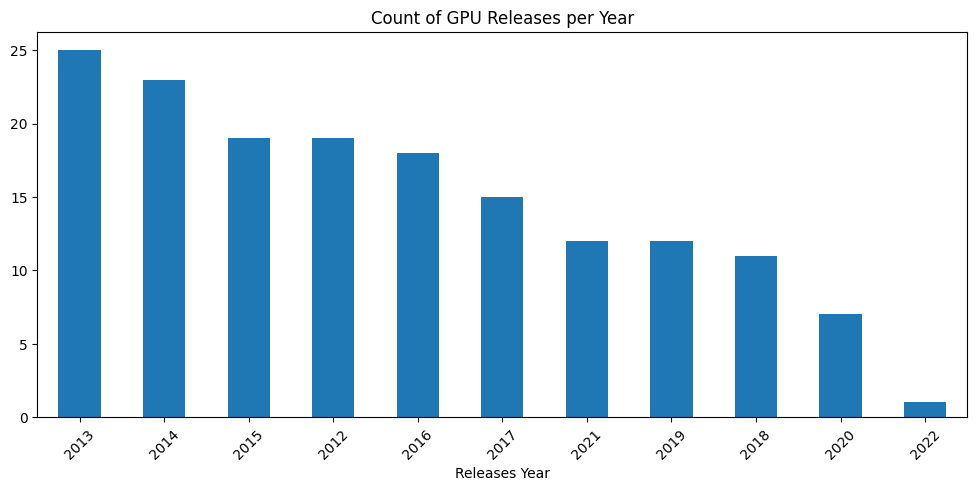

In [56]:
ax = merge_df['releaseYear'].value_counts() \
    .plot(kind='bar', figsize=(12, 5), title='Count of GPU Releases per Year')
ax.set_xlabel('Releases Year')
plt.xticks(rotation=45)
plt.show()

### Top 10 GPU CUDA Score

In [57]:
#Top 10 CUDA Score

cuda_sorted10 = merge_df[['manufacturer','productName','CUDA Score']].sort_values(by='CUDA Score', ascending=False).head(10)
cuda_sorted10

,manufacturer,productName,CUDA Score
22,NVIDIA,GeForce RTX 3090 Ti,260346
163,NVIDIA,GeForce RTX 3090,238123
80,NVIDIA,GeForce RTX 3080 Ti,235513
196,NVIDIA,RTX A6000,224604
161,NVIDIA,GeForce RTX 3080,206390
117,NVIDIA,RTX A5000,193384
52,NVIDIA,A10G,187763
310,NVIDIA,Quadro GV100,180942
462,NVIDIA,TITAN V,179522
305,NVIDIA,GeForce RTX 2080 Ti,176681


### Memory Size/Clock vs. CUDA Score

c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: Fu

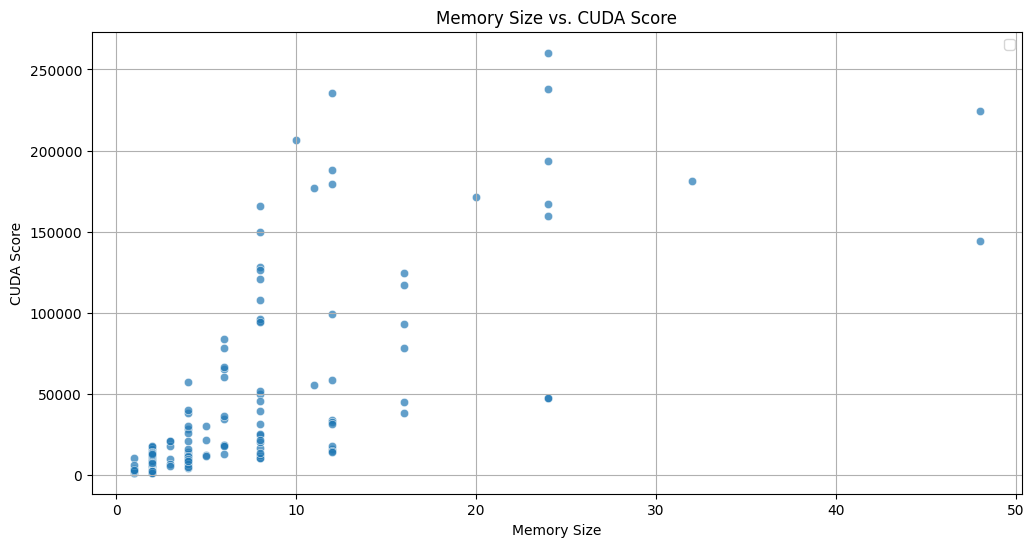

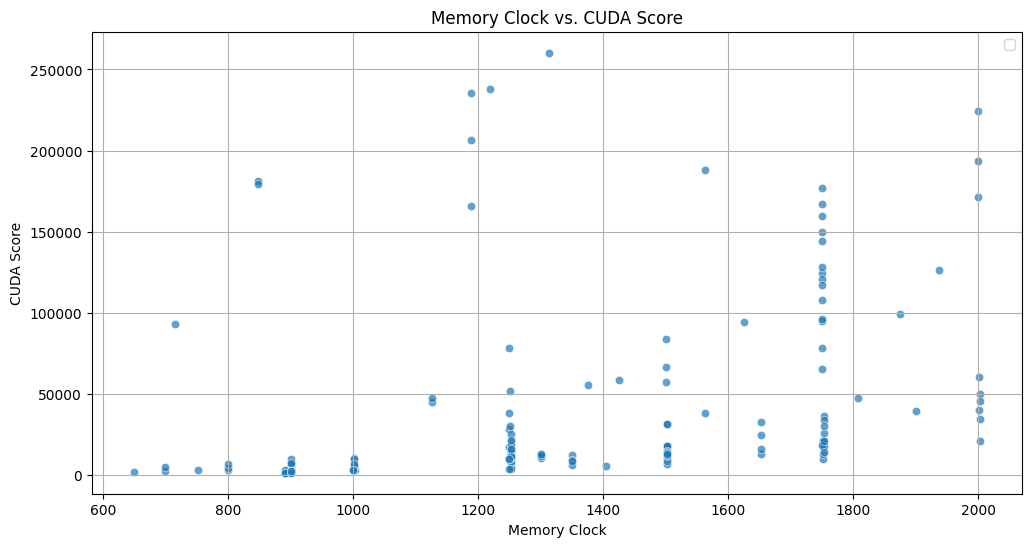

In [58]:
# Plotting a pair plot

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merge_df, x='memSize', y='CUDA Score', alpha=0.7)
plt.title('Memory Size vs. CUDA Score')
plt.xlabel('Memory Size')
plt.ylabel('CUDA Score')
plt.grid(True)
plt.legend(loc='best')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merge_df, x='memClock', y='CUDA Score', alpha=0.7)
plt.title('Memory Clock vs. CUDA Score')
plt.xlabel('Memory Clock')
plt.ylabel('CUDA Score')
plt.grid(True)
plt.legend(loc='best')


plt.show()

### GPU Price per Performance

In [59]:
merge_df['Price per Performance'] = merge_df['CUDA Score'] / merge_df['Price (USD)']

merge_df[['productName','Price per Performance']]

,productName,Price per Performance
22,GeForce RTX 3090 Ti,123.974876
52,A10G,NaN
54,A2,NaN
70,GeForce RTX 3060,301.559271
77,GeForce RTX 3070 Ti,221.157615
...,...,...
1061,Quadro K2000M,16.557901
1063,Quadro K4000M,18.307087
1064,Quadro K5000,34.369478
1120,Tesla K20c,NaN


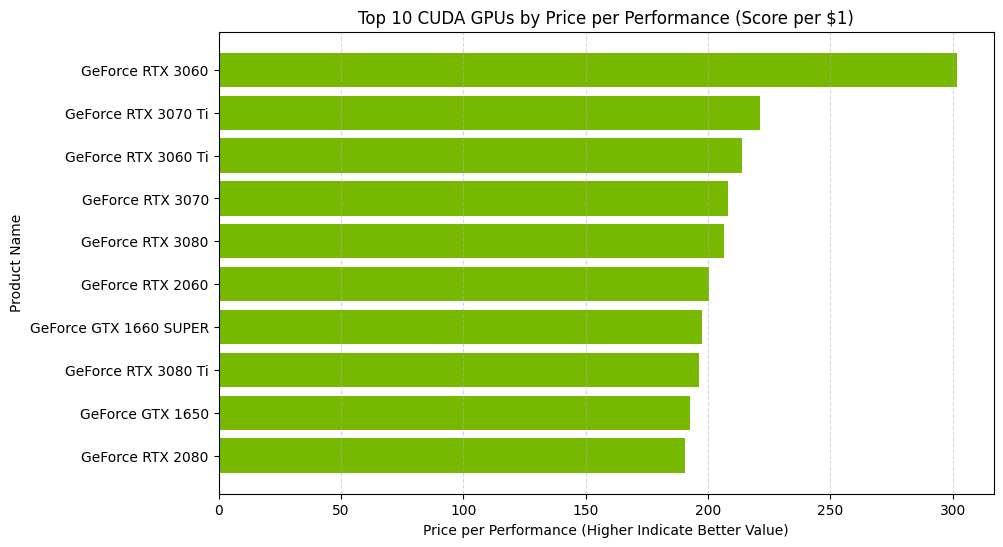

In [60]:
merge_df_sort = merge_df.sort_values(by='Price per Performance', ascending=False)
  
top10_ppp = merge_df_sort.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10_ppp['productName'], top10_ppp['Price per Performance'], color='#76b900')
plt.xlabel('Price per Performance (Higher Indicate Better Value)')
plt.ylabel('Product Name')
plt.title('Top 10 CUDA GPUs by Price per Performance (Score per $1)')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

### Memory Type and GPU Chip for the Top 10 Value GPU 


In [61]:
top10_ppp = merge_df_sort.head(10)
top10_ppp[['productName','memSize','memType','gpuChip','CUDA Score']]

,productName,memSize,memType,gpuChip,CUDA Score
70,GeForce RTX 3060,12,GDDR6,GA106,99213
77,GeForce RTX 3070 Ti,8,GDDR6X,GA104,165866
157,GeForce RTX 3060 Ti,8,GDDR6,GA104,128321
159,GeForce RTX 3070,8,GDDR6,GA104,149734
161,GeForce RTX 3080,10,GDDR6X,GA102,206390
219,GeForce RTX 2060,6,GDDR6,TU106,78091
208,GeForce GTX 1660 SUPER,6,GDDR6,TU116,65154
80,GeForce RTX 3080 Ti,12,GDDR6X,GA102,235513
202,GeForce GTX 1650,4,GDDR5,TU117,40258
303,GeForce RTX 2080,8,GDDR6,TU104,120612


#### Comparing RTX 3060 and RTX 3090 Ti

**How does RTX 3060 compare to the highest CUDA Score GPU, RTX 3090ti**

In [62]:
gpu_compare = merge_df[(merge_df['productName'] == 'GeForce RTX 3060') | (merge_df['productName'] == 'GeForce RTX 3090 Ti')]
gpu_compare[['productName','memSize','Fab','Die size','CUDA Score','Price (USD)','Price per Performance']]

,productName,memSize,Fab,Die size,CUDA Score,Price (USD),Price per Performance
22,GeForce RTX 3090 Ti,24,8.0,628.0,260346,2099.99,123.974876
70,GeForce RTX 3060,12,NaN,NaN,99213,329.00,301.559271


In [63]:
gpu3060 = merge_df[merge_df['productName'] == 'RTX 3060']
gpu3090ti = merge_df[merge_df['productName'] == 'RTX 3090ti']

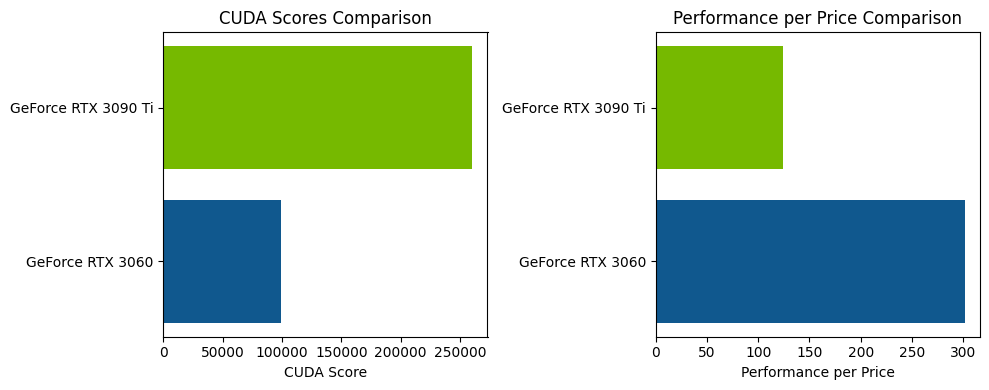

In [64]:
gpu_names = ['GeForce RTX 3060', 'GeForce RTX 3090 Ti']
cuda_scores = [99213, 260346] 
performance_per_price = [301.559271, 123.974876] 

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].barh(gpu_names, cuda_scores, color=['#10588e', '#76b900'])
axs[0].set_xlabel('CUDA Score')
axs[0].set_title('CUDA Scores Comparison')

axs[1].barh(gpu_names, performance_per_price, color=['#10588e', '#76b900'])
axs[1].set_xlabel('Performance per Price')
axs[1].set_title('Performance per Price Comparison')

plt.tight_layout()
plt.show()

#### Function for correlation calculations

In [65]:
# Creating a Correlation function for multiple use 

def calculate_correlation(merge_df, variable1, variable2):
    
    cleaned_df = merge_df.dropna(subset=[variable1, variable2])
    correlation_matrix = np.corrcoef(cleaned_df[variable1], cleaned_df[variable2])
    correlation_coefficient = correlation_matrix[0, 1]
    
    return correlation_coefficient

### Fab Size / CUDA Score

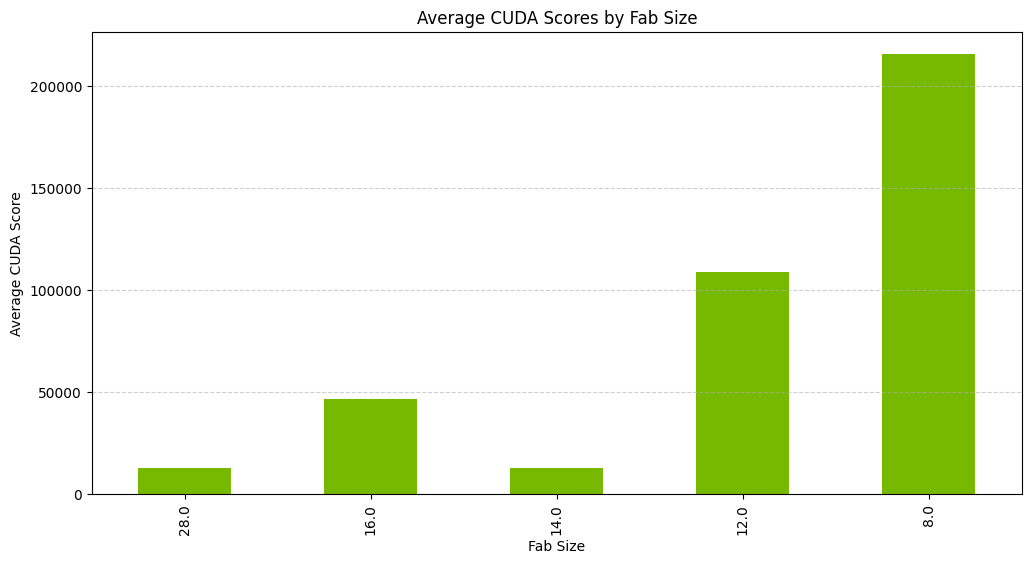

In [66]:
fab_cuda_scores = merge_df.groupby('Fab')['CUDA Score'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
fab_cuda_scores.plot(kind='bar', color='#76b900')
plt.title('Average CUDA Scores by Fab Size')
plt.xlabel('Fab Size')
plt.ylabel('Average CUDA Score')
plt.gca().invert_xaxis()  # Invert x-axis for largest to smallest
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Die size / CUDA Score

In [67]:
correlation_mbw_cuda = calculate_correlation(merge_df,'Die size','CUDA Score')
print(f'Correlation between Die Size and CUDA Score: {correlation_mbw_cuda:.2f}')

Correlation between Die Size and CUDA Score: 0.66


c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


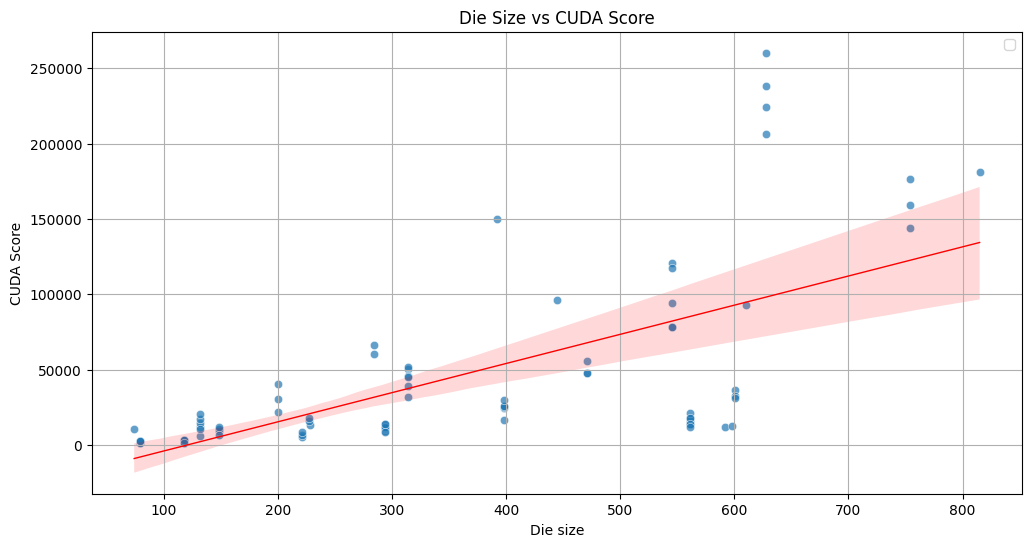

In [68]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merge_df, x='Die size', y='CUDA Score', alpha=0.7)
plt.title('Die Size vs CUDA Score')
plt.xlabel('Die Size (Largest to smallest)')
plt.ylabel('CUDA Score')
plt.grid(True)
plt.legend(loc='best')

sns.regplot(data=merge_df, x='Die size', y='CUDA Score', scatter=False, color='red', line_kws={'linewidth': 1})

plt.show()

### TDP / CUDA Score




In [69]:
correlation_mbw_cuda = calculate_correlation(merge_df,'TDP','CUDA Score')
print(f'Correlation between TDP and CUDA Score: {correlation_mbw_cuda:.2f}')

Correlation between TDP and CUDA Score: 0.62


c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'TDP vs CUDA Score'}, xlabel='TDP', ylabel='CUDA Score'>

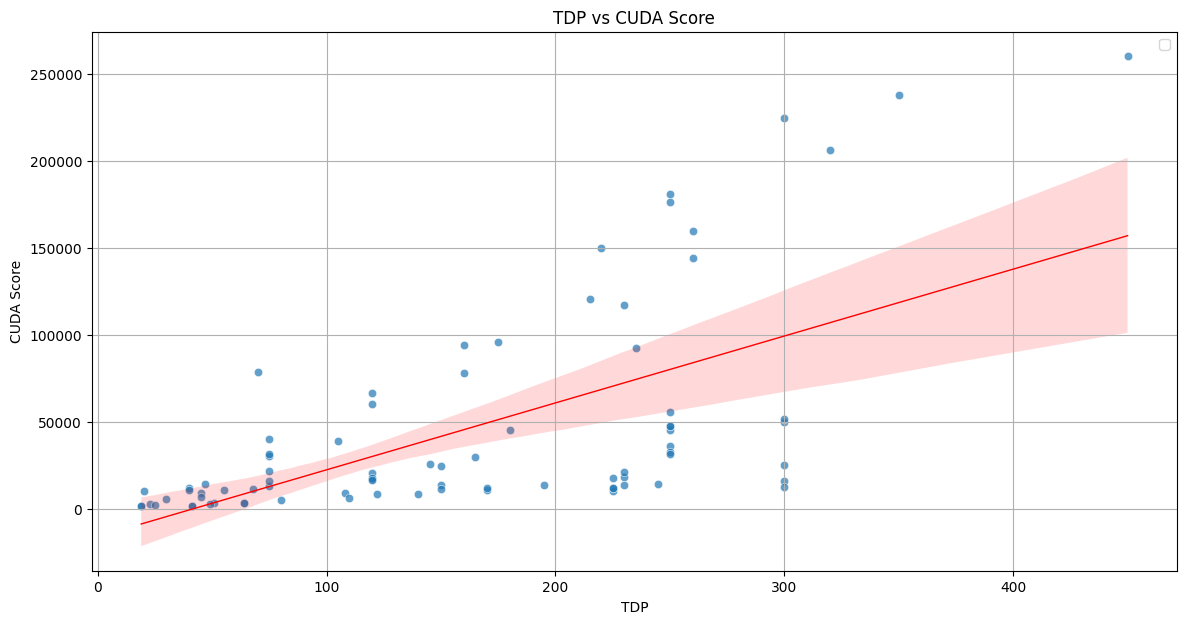

In [70]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=merge_df, x='TDP', y='CUDA Score', alpha=0.7)
plt.title('TDP vs CUDA Score')
plt.xlabel('TDP')
plt.ylabel('CUDA Score')
plt.grid(True)
plt.legend(loc='best')

sns.regplot(data=merge_df, x='TDP', y='CUDA Score',scatter=False, color='red', line_kws={'linewidth': 1})

### GFLOPS

In [71]:
merge_df.head(2)

,manufacturer,productName,releaseYear,memSize,memBusWidth,Memory speed,gpuClock,memClock,bus,memType,gpuChip,Fab,Transistors (mln),Die size,GFLOPS,TDP,CUDA Score,Price (USD),Price per Performance
22,NVIDIA,GeForce RTX 3090 Ti,2022,24,384,1008.0,1560,1313,PCIe 4.0 x16,GDDR6X,GA102,8.0,28300.0,628.0,40000.0,450.0,260346,2099.99,123.974876
52,NVIDIA,A10G,2021,12,384,NaN,1320,1563,PCIe 4.0 x16,GDDR6,GA102,NaN,NaN,NaN,NaN,NaN,187763,NaN,NaN


c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': 'GFLOPS vs CUDA Score'}, xlabel='GFLOPS', ylabel='CUDA Score'>

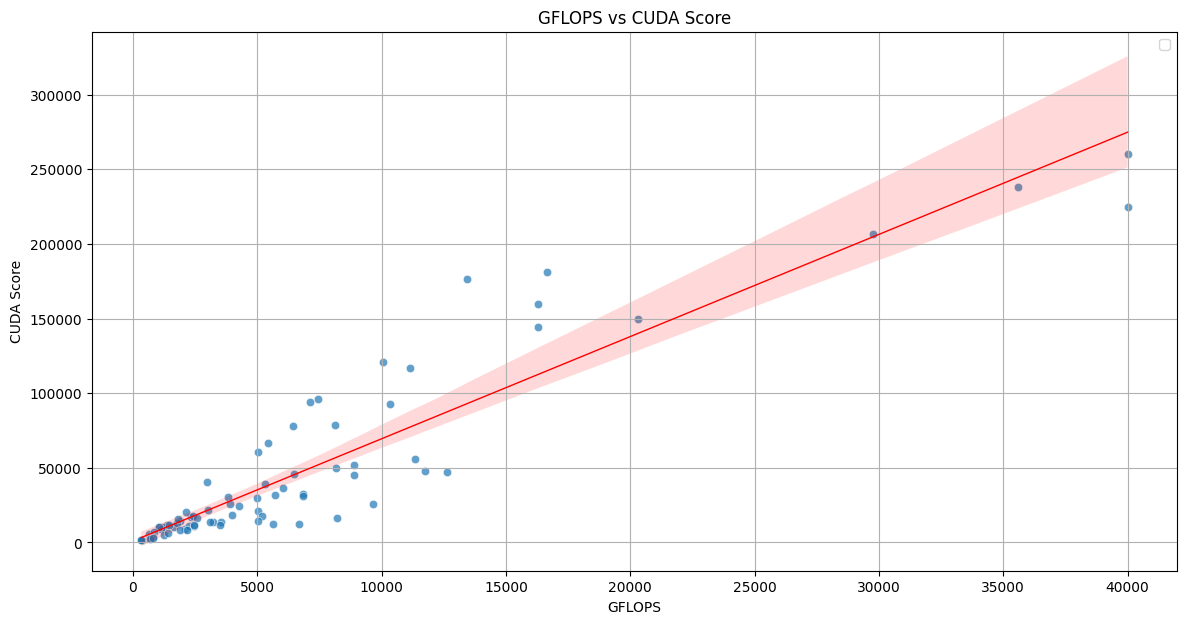

In [72]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=merge_df, x='GFLOPS', y='CUDA Score', alpha=0.7)
plt.title('GFLOPS vs CUDA Score')
plt.xlabel('CUDA Score')
plt.ylabel('GFLOPS')
plt.grid(True)
plt.legend(loc='best')

sns.regplot(data=merge_df, x='GFLOPS', y='CUDA Score',scatter=False, color='red', line_kws={'linewidth': 1})

### Pairplot

In [73]:
merge_df.columns

Index(['manufacturer', 'productName', 'releaseYear', 'memSize', 'memBusWidth',
       'Memory speed', 'gpuClock', 'memClock', 'bus', 'memType', 'gpuChip',
       'Fab', 'Transistors (mln)', 'Die size', 'GFLOPS', 'TDP', 'CUDA Score',
       'Price (USD)', 'Price per Performance'],
      dtype='object')

c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\willh\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

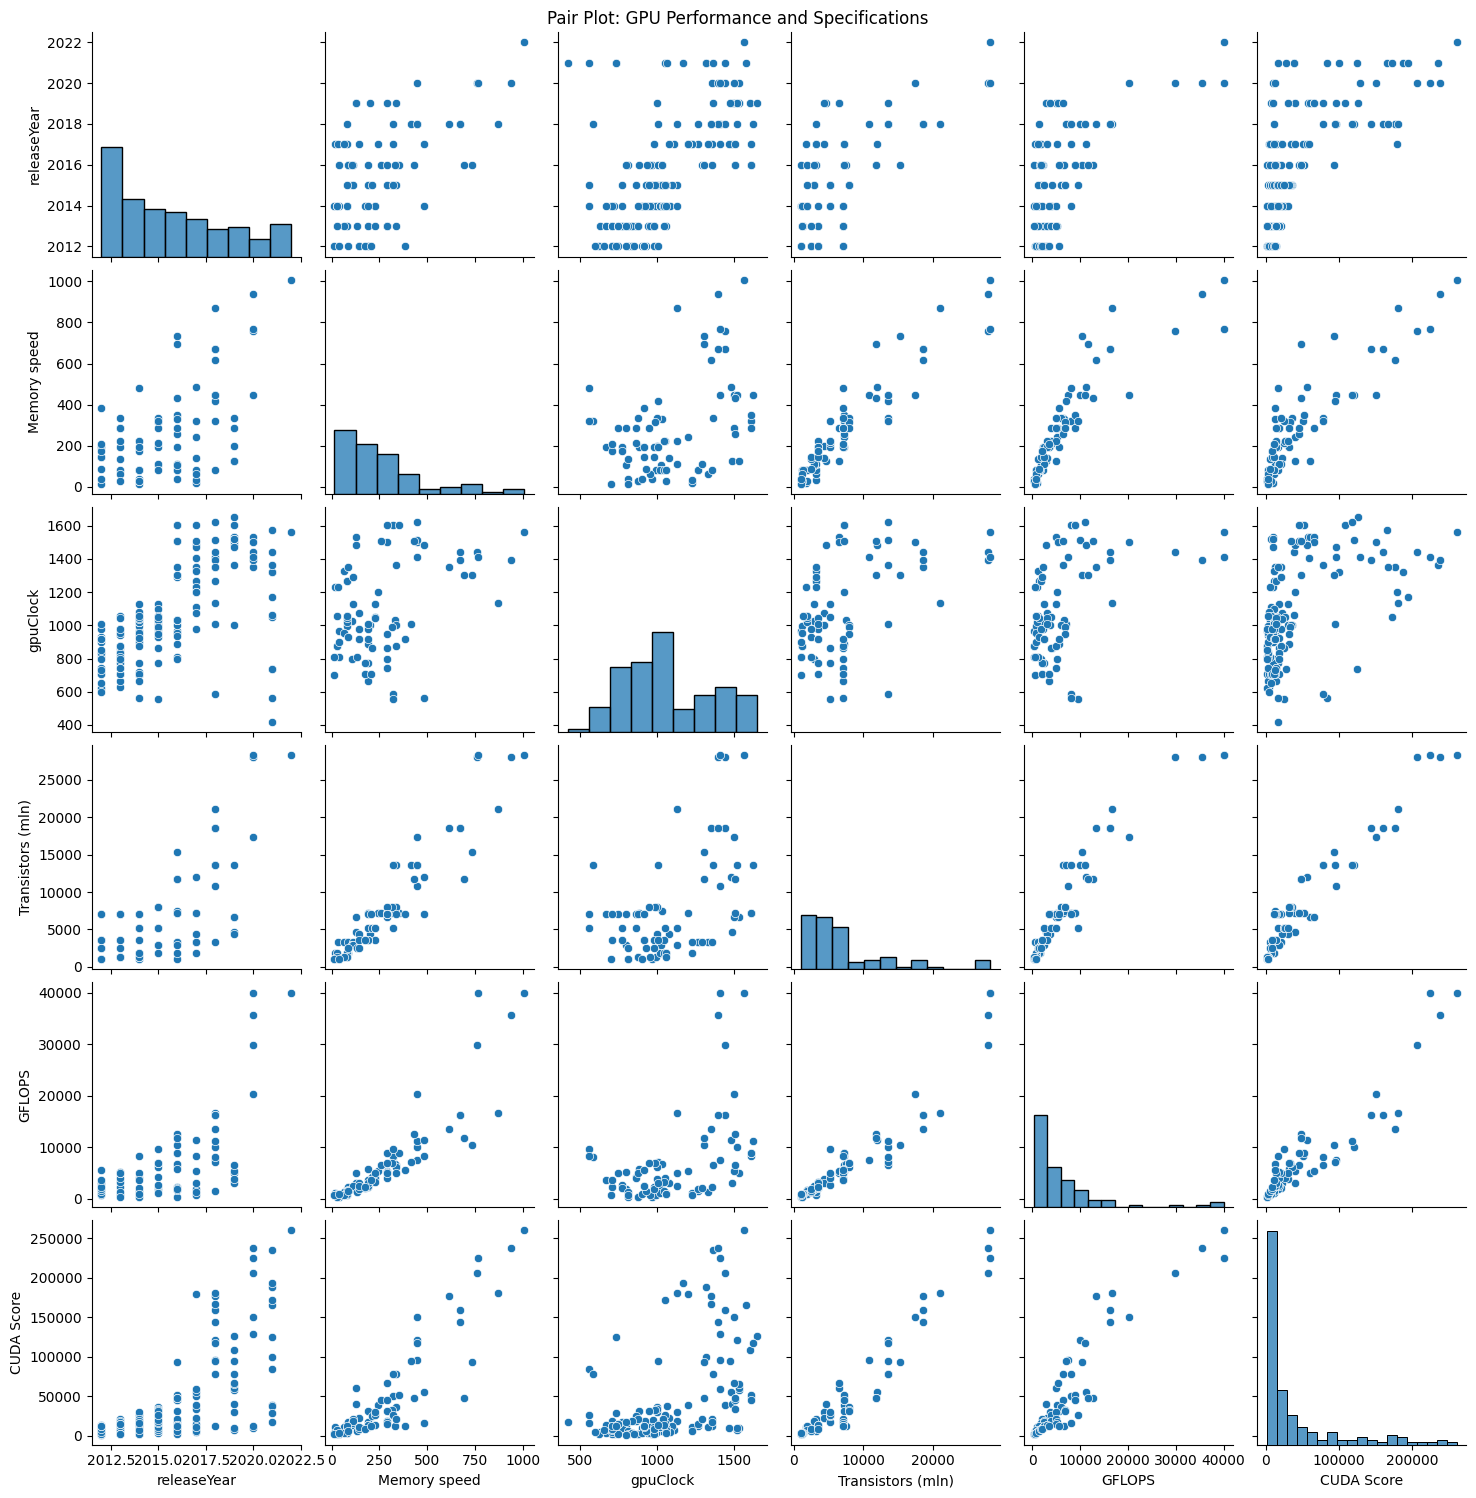

In [74]:
sns.pairplot(merge_df, vars=['releaseYear','Memory speed', 'gpuClock', 'Transistors (mln)', 'GFLOPS','CUDA Score'],
            kind='scatter')
plt.suptitle('Pair Plot: GPU Performance and Specifications', y=1)
plt.show()